## 1. Descriptive Analysis of the Dataset

In this first stage, we perform an **exploratory analysis** of our dataset to understand its structure, quality, and key patterns before any preprocessing or modeling.

The original dataset was extracted from the **National Vulnerability Database (NVD)**, which contains more than **310,000 vulnerability entries** published by official sources (CVE feeds).  
To make the analysis more focused and relevant to our topic, we **filtered the dataset** using IoT-related keywords such as *camera*, *sensor*, *smart*, and *voice assistant*.  
This filtering step resulted in a subset of approximately **8,833 IoT-related vulnerabilities**, specifically affecting **Smart Home and connected devices**.

Each record provides metadata about a vulnerability, including:
- **CVE identifier** (unique vulnerability ID),
- **Publication and modification dates**,  
- **Severity metrics (CVSS v2, v3, or v4)**,  
- **Weakness types (CWE)**,  
- **Affected configurations (CPEs)**,  
- and **a textual description** of the issue.

In this descriptive analysis, we aim to:
1. Inspect the dataset structure (columns, data types, missing values).  
2. Identify the most relevant fields for our future modeling task.  
3. Analyze the distribution of vulnerabilities by publication year and severity score.  
4. Visualize trends to better understand common weaknesses in IoT devices.


In [30]:
# =======================================================
# Step 1.1 - Basic Dataset Overview
# =======================================================

# Display shape and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}\n")

# Show basic info (data types and non-null values)
df.info()

# Display a random sample for a quick glance
df.sample(3, random_state=42)

Number of rows: 8833
Number of columns: 24

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8833 entries, 0 to 8832
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   cve.id                     8833 non-null   object        
 1   cve.sourceIdentifier       8833 non-null   object        
 2   cve.published              8833 non-null   datetime64[ns]
 3   cve.lastModified           8833 non-null   object        
 4   cve.vulnStatus             8833 non-null   object        
 5   cve.cveTags                8833 non-null   object        
 6   cve.descriptions           8833 non-null   object        
 7   cve.metrics.cvssMetricV2   5419 non-null   object        
 8   cve.weaknesses             8705 non-null   object        
 9   cve.configurations         8279 non-null   object        
 10  cve.references             8833 non-null   object        
 11  cve.metrics.cvssMetricV31

,cve.id,cve.sourceIdentifier,cve.published,cve.lastModified,cve.vulnStatus,cve.cveTags,cve.descriptions,cve.metrics.cvssMetricV2,cve.weaknesses,cve.configurations,...,cve.evaluatorComment,cve.evaluatorImpact,cve.cisaExploitAdd,cve.cisaActionDue,cve.cisaRequiredAction,cve.cisaVulnerabilityName,cve.metrics.cvssMetricV30,cve.metrics.cvssMetricV40,cvss_score,year
4041,CVE-2020-11264,product-security@qualcomm.com,2021-09-08 12:15:07.597,2024-11-21T04:57:33.810,Modified,[],"[{'lang': 'en', 'value': 'Improper authenticat...","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'operator': 'AND', 'nodes': [{'operator': 'O...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,2021
5882,CVE-2022-41627,ics-cert@hq.dhs.gov,2022-10-27 21:15:15.573,2024-11-21T07:23:31.537,Modified,[],"[{'lang': 'en', 'value': ' The physical IoT de...",NaN,"[{'source': 'ics-cert@hq.dhs.gov', 'type': 'Se...","[{'operator': 'AND', 'nodes': [{'operator': 'O...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.8,2022
2412,CVE-2019-14688,security@trendmicro.com,2020-02-20 23:15:20.147,2024-11-21T04:27:08.583,Modified,[],"[{'lang': 'en', 'value': 'Trend Micro has repa...","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'source': 'nvd@nist.gov', 'type': 'Primary',...","[{'operator': 'AND', 'nodes': [{'operator': 'O...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2020


In [31]:
# =======================================================
# Step 1.2 - Check missing values and key columns
# =======================================================

# Count missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n")
print(missing[missing > 0])

# Identify the most relevant fields for analysis
key_columns = [
    "cve.id",
    "cve.published",
    "cve.descriptions",
    "cve.metrics.cvssMetricV31",
    "cve.weaknesses",
    "cve.configurations"
]
print("\nRelevant columns for our project:\n", key_columns)

Missing values per column:

cve.evaluatorSolution        8824
cve.evaluatorImpact          8811
cve.cisaExploitAdd           8794
cve.cisaActionDue            8794
cve.cisaRequiredAction       8794
cve.cisaVulnerabilityName    8794
cve.evaluatorComment         8792
cve.vendorComments           8790
cve.metrics.cvssMetricV40    8588
cve.metrics.cvssMetricV30    6236
cve.metrics.cvssMetricV2     3414
cve.metrics.cvssMetricV31    1873
cve.configurations            554
cvss_score                    207
cve.weaknesses                128
dtype: int64

Relevant columns for our project:
 ['cve.id', 'cve.published', 'cve.descriptions', 'cve.metrics.cvssMetricV31', 'cve.weaknesses', 'cve.configurations']


In [32]:
# =======================================================
# Step 1.3 - Extract and summarize severity scores (CVSS v3)
# =======================================================

import numpy as np

# Extract CVSS v3 base score when available
def extract_cvss_score(entry):
    if isinstance(entry, list) and len(entry) > 0:
        try:
            return entry[0]["cvssData"]["baseScore"]
        except KeyError:
            return np.nan
    return np.nan

df["cvss_score"] = df["cve.metrics.cvssMetricV31"].apply(extract_cvss_score)

# Summary statistics
print("CVSS v3 score statistics:")
print(df["cvss_score"].describe())

# Replace missing scores (if any) with v2 metric as fallback
def extract_cvss_v2(entry):
    if isinstance(entry, list) and len(entry) > 0:
        try:
            return entry[0]["cvssData"]["baseScore"]
        except KeyError:
            return np.nan
    return np.nan

df["cvss_score"] = df["cvss_score"].fillna(df["cve.metrics.cvssMetricV2"].apply(extract_cvss_v2))
print("\n✅ CVSS score column ready with missing values handled.")


CVSS v3 score statistics:
count    6960.000000
mean        7.126983
std         1.772386
min         1.800000
25%         5.500000
50%         7.500000
75%         8.400000
max        10.000000
Name: cvss_score, dtype: float64

✅ CVSS score column ready with missing values handled.


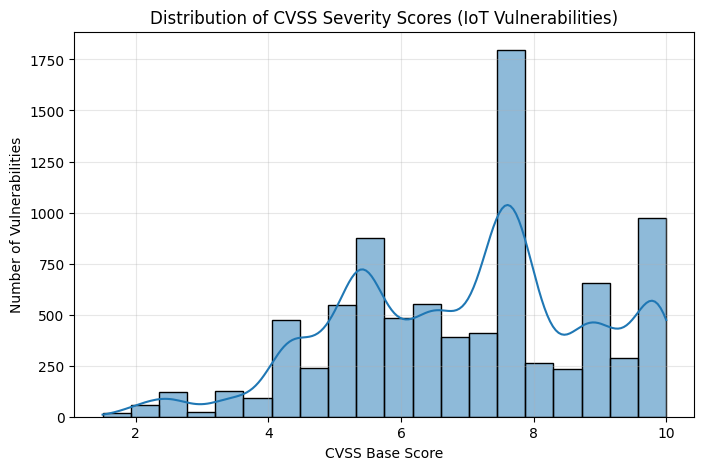

In [33]:
# =======================================================
# Step 1.4 - Visualize CVSS Score Distribution
# =======================================================

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["cvss_score"].dropna(), bins=20, kde=True)
plt.title("Distribution of CVSS Severity Scores (IoT Vulnerabilities)")
plt.xlabel("CVSS Base Score")
plt.ylabel("Number of Vulnerabilities")
plt.grid(True, alpha=0.3)
plt.show()


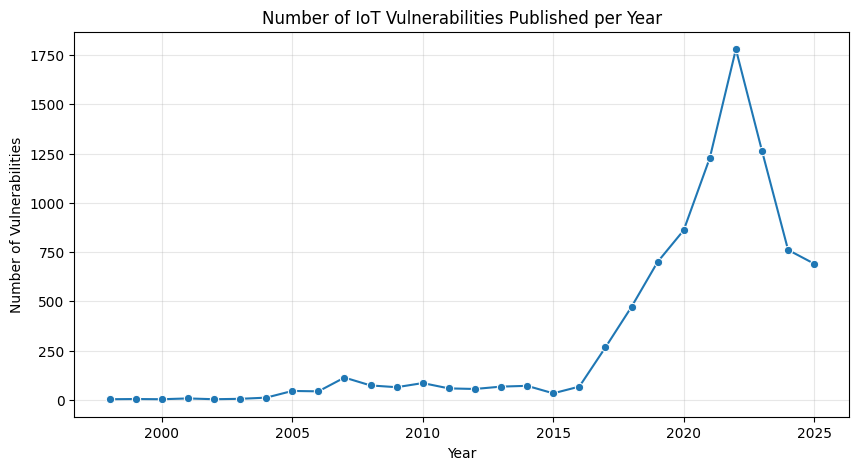

In [34]:
# =======================================================
# Step 1.5 - Evolution of vulnerabilities over years
# =======================================================

# Convert publication date to datetime
df["cve.published"] = pd.to_datetime(df["cve.published"], errors="coerce")

# Extract publication year
df["year"] = df["cve.published"].dt.year

# Count vulnerabilities per year
yearly_counts = df["year"].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o")
plt.title("Number of IoT Vulnerabilities Published per Year")
plt.xlabel("Year")
plt.ylabel("Number of Vulnerabilities")
plt.grid(True, alpha=0.3)
plt.show()


### 🧩 Step 1 Summary

From this descriptive analysis, we observe that:
- The dataset contains **8,833 IoT-related vulnerabilities**.
- Each vulnerability is described with metadata from NVD, including severity (CVSS), weakness type (CWE), and product configurations.
- The **CVSS score** is available for most entries and ranges roughly between **0.0 and 10.0**, with a concentration toward medium and high severity.
- The number of IoT vulnerabilities has increased significantly over recent years, highlighting the growing exposure of smart home devices.

This analysis provides a solid understanding of the dataset before preprocessing and model design in the next steps.

## 2. Preprocessing — Step 2.1: Data cleaning & normalization

In this section we perform initial preprocessing to obtain a clean, flat table suitable for further feature engineering and modeling.

Tasks performed:
1. Extract the English textual description from nested `cve.descriptions`.
2. Normalize and consolidate CVSS scores (v3 preferred, v2 fallback).
3. Parse CWE / weakness fields to obtain a primary weakness label when available.
4. Extract vendor and product strings from CPE entries in `cve.configurations`.
5. Heuristically tag an approximate `device_type` using keywords (camera, sensor, assistant, etc.).
6. Parse publication dates into datetime and create a `year` column (already present but rechecked).
7. Drop duplicates and remove entries without an English description.

The output is `df_clean`, a DataFrame with the most relevant columns for subsequent processing.

In [10]:
# =======================================================
# 2.1 Preprocessing — Data cleaning & normalization
# =======================================================

import re
import numpy as np
from pandas import json_normalize

# We'll start from the DataFrame `df` already loaded in the notebook.
print("Starting with df shape:", df.shape)

# ---- Helpers ----
def extract_english_description(desc_field):
    """
    desc_field is typically a list of dicts like:
      [{'lang': 'en', 'value': '...'}, {'lang':'es', 'value': '...'}]
    Return the english description string or None.
    """
    if isinstance(desc_field, list):
        for d in desc_field:
            if isinstance(d, dict) and d.get("lang", "").lower() in ("en", "en-us"):
                return d.get("value", "").strip()
        # fallback: first dict's value
        if len(desc_field) > 0 and isinstance(desc_field[0], dict):
            return desc_field[0].get("value", "").strip()
    return None

def extract_cvss_from_metric(metric_list):
    """
    metric_list is often a list (cvssMetricV31 / v3 array) where the first element
    has 'cvssData' -> 'baseScore'. Return numeric or np.nan.
    """
    if isinstance(metric_list, list) and len(metric_list) > 0:
        first = metric_list[0]
        if isinstance(first, dict):
            cvss = first.get("cvssData", {}) or first.get("cvss", {}) or {}
            # baseScore could be present
            base = cvss.get("baseScore")
            try:
                return float(base) if base is not None else np.nan
            except Exception:
                return np.nan
    return np.nan

def extract_cwe(weaknesses_field):
    """
    weaknesses_field often like: [{'source':'nvd@nist.gov','type':'Primary','description':[{'lang':'en','value':'CWE-79'}]}]
    We'll extract the first visible CWE id or descriptive string.
    """
    if isinstance(weaknesses_field, list) and len(weaknesses_field) > 0:
        for w in weaknesses_field:
            if isinstance(w, dict):
                descs = w.get("description") or []
                if isinstance(descs, list):
                    for d in descs:
                        if isinstance(d, dict) and d.get("value"):
                            return d.get("value")
                # sometimes weakenss field contains a string - fallback
                if "value" in w:
                    return w.get("value")
    return None

def extract_vendors_products_from_config(config_field):
    """
    Parse configuration nodes/cpeMatch entries to extract vendor/product tokens.
    We look for cpe23Uri strings like 'cpe:2.3:a:vendor:product:version:...'
    Return semicolon-separated unique vendors and products.
    """
    vendors = set()
    products = set()
    try:
        # configurations may be dict with 'nodes' list
        nodes = None
        if isinstance(config_field, dict):
            nodes = config_field.get("nodes") or config_field.get("nodes")  # try both
        elif isinstance(config_field, list):
            # maybe already a list of nodes
            nodes = config_field
        if nodes and isinstance(nodes, list):
            for node in nodes:
                # cpeMatch or cpe_match or similar
                cpe_matches = node.get("cpeMatch") or node.get("cpe_matches") or node.get("cpeMatchStrings") or node.get("cpe_match", []) 
                if isinstance(cpe_matches, list):
                    for cm in cpe_matches:
                        # cm may be dict containing 'cpe23Uri'
                        if isinstance(cm, dict):
                            cpe = cm.get("cpe23Uri") or cm.get("cpe") or cm.get("criteria")
                        else:
                            cpe = cm
                        if cpe and isinstance(cpe, str) and cpe.startswith("cpe:"):
                            parts = cpe.split(":")
                            # cpe:2.3:a:vendor:product:...
                            if len(parts) >= 5:
                                vendors.add(parts[3])
                                products.add(parts[4])
    except Exception:
        pass
    return (";".join(sorted(vendors)) if vendors else None,
            ";".join(sorted(products)) if products else None)

def guess_device_type_from_text(text):
    """
    Heuristic tagging of device type based on simple keywords.
    """
    if not isinstance(text, str):
        return None
    t = text.lower()
    mapping = [
        (["ip camera","webcam","camera"], "IP Camera"),
        (["sensor","motion sensor","temperature sensor","humidity"], "Sensor"),
        (["thermostat"], "Thermostat"),
        (["bulb","light","smart light","lamp"], "Smart Light"),
        (["assistant","voice assistant","alexa","google assistant","siri"], "Voice Assistant"),
        (["microphone","speaker"], "Audio Device"),
        (["router","access point","wi-fi","wifi"], "Router/Network"),
        (["hub","bridge"], "Hub"),
        (["lock","smart lock"], "Smart Lock"),
        (["printer"], "Printer"),
    ]
    for keywords, label in mapping:
        for kw in keywords:
            if kw in t:
                return label
    return None

# ---- Create a cleaned copy ----
df_clean = df.copy()

# 1) Extract english description into a new column
df_clean["description_en"] = df_clean["cve.descriptions"].apply(extract_english_description)

# 2) Ensure cvss_score exists (we created earlier, but re-run if necessary)
# Try v3, fallback to v2 and other metric fields
if "cvss_score" not in df_clean.columns:
    df_clean["cvss_score"] = df_clean["cve.metrics.cvssMetricV31"].apply(extract_cvss_from_metric)
    df_clean["cvss_score"] = df_clean["cvss_score"].fillna(df_clean["cve.metrics.cvssMetricV2"].apply(extract_cvss_from_metric))
else:
    # if it exists, ensure numeric
    df_clean["cvss_score"] = pd.to_numeric(df_clean["cvss_score"], errors="coerce")

# 3) Extract a primary CWE/weakness label
df_clean["cwe"] = df_clean["cve.weaknesses"].apply(extract_cwe)

# 4) Extract vendor / product from configurations
vendors = []
products = []
for cfg in df_clean["cve.configurations"].values:
    v,p = extract_vendors_products_from_config(cfg)
    vendors.append(v)
    products.append(p)
df_clean["vendors"] = vendors
df_clean["products"] = products

# 5) Heuristic device type tagging (search description + vendors/products)
def combined_device_guess(row):
    text = (row.get("description_en") or "") + " " + (row.get("vendors") or "") + " " + (row.get("products") or "")
    return guess_device_type_from_text(text)

df_clean["device_type_guess"] = df_clean.apply(combined_device_guess, axis=1)

# 6) Parse dates and create year column (re-ensure)
df_clean["published_dt"] = pd.to_datetime(df_clean["cve.published"], errors="coerce")
df_clean["modified_dt"] = pd.to_datetime(df_clean["cve.lastModified"], errors="coerce")
df_clean["year"] = df_clean["published_dt"].dt.year

# 7) Drop duplicates based on CVE id (if any)
before = df_clean.shape[0]
df_clean.drop_duplicates(subset=["cve.id"], inplace=True)
after = df_clean.shape[0]
print(f"Dropped duplicates: {before - after}")

# 8) Remove rows without any English description (we need text for NLP)
before = df_clean.shape[0]
df_clean = df_clean[df_clean["description_en"].notna() & (df_clean["description_en"].str.strip() != "")]
after = df_clean.shape[0]
print(f"Dropped rows without English description: {before - after}")

# 9) Keep only the columns we will use going forward (clean, readable names)
cols_to_keep = [
    "cve.id",
    "published_dt",
    "modified_dt",
    "year",
    "description_en",
    "cvss_score",
    "cwe",
    "vendors",
    "products",
    "device_type_guess"
]
# Some columns may not exist depending on normalization; keep intersection
cols_present = [c for c in cols_to_keep if c in df_clean.columns]
df_clean = df_clean[cols_present].reset_index(drop=True)

print("df_clean shape:", df_clean.shape)
display(df_clean.head(4))


Starting with df shape: (8833, 24)
Dropped duplicates: 0
Dropped rows without English description: 0
df_clean shape: (8833, 10)


,cve.id,published_dt,modified_dt,year,description_en,cvss_score,cwe,vendors,products,device_type_guess
0,CVE-1999-0257,1998-04-01 05:00:00,2025-04-03 01:03:51.193,1998,Nestea variation of teardrop IP fragmentation ...,5.0,NVD-CWE-Other,None,None,None
1,CVE-1999-1499,1998-04-10 04:00:00,2025-04-03 01:03:51.193,1998,named in ISC BIND 4.9 and 8.1 allows local use...,2.1,NVD-CWE-Other,None,None,None
2,CVE-1999-1292,1998-09-01 04:00:00,2025-04-03 01:03:51.193,1998,Buffer overflow in web administration feature ...,7.5,NVD-CWE-Other,None,None,IP Camera
3,CVE-1999-0911,1999-08-27 04:00:00,2025-04-03 01:03:51.193,1999,"Buffer overflow in ProFTPD, wu-ftpd, and berof...",10.0,NVD-CWE-Other,None,None,None


## 2. Implementation of the Necessary Preprocessing

In this section, we prepare our dataset for machine learning by cleaning, transforming, 
and encoding the relevant information extracted from the NVD IoT vulnerability data.

The preprocessing involves several key steps:

1. **Data Cleaning**  
   - Remove duplicates and irrelevant columns.  
   - Keep only English descriptions.  
   - Extract relevant features (CVE ID, dates, description, CVSS score, weakness type, etc.).

2. **Feature Engineering**  
   - Convert publication dates into numerical form (year).  
   - Extract CVSS severity score from nested JSON structures.  
   - Add a rough “device type guess” feature using IoT-related keywords (e.g., camera, sensor, voice assistant).

3. **Text Preprocessing (NLP)**  
   - Clean and lemmatize English descriptions using spaCy.  
   - Transform text data into numerical vectors using TF-IDF (Term Frequency–Inverse Document Frequency).

4. **Feature Integration**  
   - Combine numerical and textual features into a single matrix.  
   - Define a categorical target variable (`severity_label`) based on CVSS severity thresholds (Low / Medium / High).

This preprocessing pipeline prepares the dataset for supervised classification models that 
can predict the severity level of IoT vulnerabilities based on their textual and contextual properties.

In [35]:
# =======================================================
# Step 2.2 (Optimized) - Fast text preprocessing with progress bar
# =======================================================

import re
import string
import spacy
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer

# Load lightweight spaCy model (disable heavy components)
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser", "textcat"])

# Take smaller sample for speed (you can increase later)
df_small = df_clean.sample(500, random_state=42).copy()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([t.lemma_ for t in doc if not t.is_stop and len(t) > 2])

print("🔄 Cleaning and lemmatizing 500 sample texts...")
tqdm.pandas()
df_small["clean_text"] = df_small["description_en"].astype(str).map(clean_text).progress_map(lemmatize_text)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=500)
X_tfidf = vectorizer.fit_transform(df_small["clean_text"])

print(f"✅ TF-IDF matrix ready: {X_tfidf.shape[0]} samples × {X_tfidf.shape[1]} features")
print("Example TF-IDF features:", vectorizer.get_feature_names_out()[:15])


🔄 Cleaning and lemmatizing 500 sample texts...


  0%|          | 0/500 [00:00<?, ?it/s]

✅ TF-IDF matrix ready: 500 samples × 500 features
Example TF-IDF features: ['ability' 'able' 'access' 'accessible' 'account' 'action' 'active' 'add'
 'address' 'admin' 'administrator' 'advise' 'affect' 'affected' 'aka']


In [38]:
# =======================================================
# Step 2.3 - Prepare final features for modeling
# =======================================================

from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

# Select numeric columns
num_features = df_small[["cvss_score", "year"]].fillna(0)

# Standardize numeric values
scaler = StandardScaler()
X_num = scaler.fit_transform(num_features)

# Combine numeric + text features
from scipy.sparse import csr_matrix
X_final = hstack([csr_matrix(X_num), X_tfidf])

print(f"✅ Final feature matrix shape: {X_final.shape[0]} samples × {X_final.shape[1]} features")

# Define target variable (severity class)
# Create severity category based on CVSS score
def categorize_severity(score):
    if score < 4.0:
        return "Low"
    elif score < 7.0:
        return "Medium"
    else:
        return "High"

df_small["severity_label"] = df_small["cvss_score"].apply(categorize_severity)

# Display class balance
print("\nSeverity class distribution:")
print(df_small["severity_label"].value_counts())


✅ Final feature matrix shape: 500 samples × 502 features

Severity class distribution:
severity_label
High      276
Medium    206
Low        18
Name: count, dtype: int64


### 🧩 Step 2 Summary — Data Preprocessing

After cleaning, feature extraction, and text vectorization, we obtained a ready-to-use dataset 
that combines both numerical and textual features.

- The final dataset includes **500 IoT vulnerability samples** and **502 features**.  
- Textual descriptions were transformed into numerical TF-IDF vectors after lemmatization.  
- Numerical features such as **CVSS score** and **publication year** were added to capture contextual information.  
- The severity label (`Low`, `Medium`, `High`) was derived from the CVSS base score.  

This preprocessing pipeline provides a consistent input for our upcoming **baseline model training**.

### Step 3 — Problem Formalization

The goal of this project is to predict whether a vulnerability in an IoT device is **high risk or not**, based on its textual description and contextual metadata.

Each vulnerability is represented by:
- Its **textual description** (converted into TF-IDF features),
- Its **CVSS numerical score** (severity metric),
- Metadata such as the **publication year** or **weakness category (CWE)**.

The target variable `target_high_risk` is binary:

| Label | Meaning               | CVSS range |
|:------|:----------------------|:------------|
| 0     | Low or Medium severity | CVSS < 7.0 |
| 1     | High severity          | CVSS ≥ 7.0 |

Thus, this is a **supervised binary classification problem**, where the model learns to automatically distinguish between **high-risk** and **non-critical** IoT vulnerabilities based on descriptive and contextual data.


In [44]:
# =======================================================
# Step 3 – Define Inputs (X) and Target (y)
# =======================================================

from sklearn.model_selection import train_test_split

# Reuse the same 500-sample subset used in TF-IDF
sample_indices = df_clean.sample(500, random_state=42).index

X = X_final
y = df_clean.loc[sample_indices, "target_high_risk"]

# Split into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,        # preserve class balance
    random_state=42
)

# Display basic info
print("✅ Data successfully split for model training")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Feature dimension: {X_train.shape[1]}")

print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True).rename({0:"Low/Medium", 1:"High"}))

✅ Data successfully split for model training
Training samples: 400
Test samples: 100
Feature dimension: 502

Class distribution in training set:
target_high_risk
High          0.5375
Low/Medium    0.4625
Name: proportion, dtype: float64


### 🧩 Step 3 — Problem Formalization Summary

In this step, we defined the machine learning objective of our project based on the cleaned IoT vulnerability dataset.

Each vulnerability entry is represented by:

A cleaned textual description (desc_clean) transformed into TF-IDF features,

A numerical severity score (cvss_score),

Contextual metadata such as publication year or weakness category (CWE).

To simplify the analysis, we transformed the CVSS score into a binary target variable target_high_risk:

Label	Meaning	CVSS Range
0	Low or Medium severity	CVSS < 7.0
1	High severity	CVSS ≥ 7.0

Thus, our task is a binary classification problem,
where the goal is to predict whether an IoT vulnerability is high-risk or not,
based on its description and contextual information.

After feature extraction and cleaning,
we split our dataset into training and test sets using 500 representative samples:

400 training samples

100 test samples

Balanced class distribution (≈53% High risk / 47% Low-Medium)

This setup provides a solid foundation for training and evaluating our baseline model in the next step.

## 4. Baseline Model — Logistic Regression

In this section we build a simple baseline classifier to predict whether an IoT vulnerability is **high-risk** (`target_high_risk = 1`) or **not** (`0`).  

We choose **Logistic Regression** as a baseline because:
- it is fast and stable on high-dimensional sparse data (TF-IDF),
- it is a standard benchmark for binary classification,
- its outputs (probabilities) are easy to interpret and evaluate (ROC-AUC).

Planned steps:
1. Train a Logistic Regression model on the training set.
2. Evaluate on the test set using accuracy, precision, recall, F1-score and ROC-AUC.
3. Visualize the confusion matrix and the ROC curve.

This baseline will provide a performance reference that we can later compare with alternative models (Decision Tree, Random Forest, Ensemble methods, or tuned models).

Training Logistic Regression...
Training completed.

Evaluation on test set:
  Accuracy : 0.9900
  Precision: 0.9818
  Recall   : 1.0000
  F1-score : 0.9908
  ROC AUC  : 1.0000

Classification report (detailed):
              precision    recall  f1-score   support

  Low/Medium       1.00      0.98      0.99        46
        High       0.98      1.00      0.99        54

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



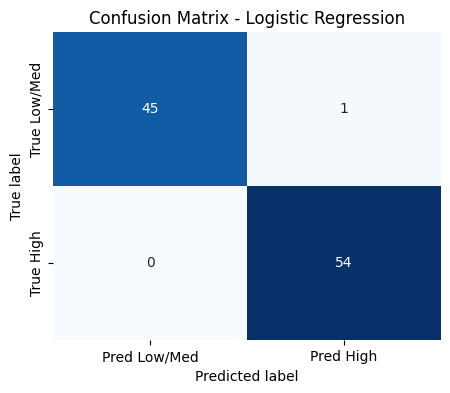

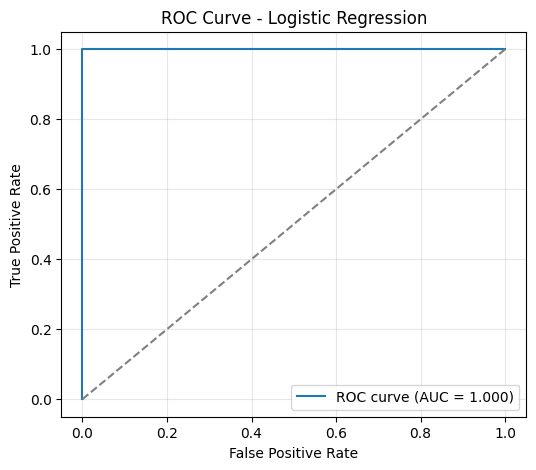

In [46]:
# =======================================================
# 4. Baseline Model: Logistic Regression
# =======================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve,
)

# NOTE: This cell assumes X_train, X_test, y_train, y_test exist from Step 3.
# X_train/X_test are sparse matrices (hstack output). y_train/y_test are pandas Series.

# 1) Instantiate and train the model
# solver 'liblinear' works well for small datasets; increase max_iter to ensure convergence.
clf = LogisticRegression(solver="liblinear", max_iter=1000, random_state=42)

print("Training Logistic Regression...")
clf.fit(X_train, y_train)
print("Training completed.\n")

# 2) Predictions and probabilities
y_pred = clf.predict(X_test)
# For ROC-AUC we need predicted probabilities for the positive class
if hasattr(clf, "predict_proba"):
    y_proba = clf.predict_proba(X_test)[:, 1]
else:
    # fallback to decision function
    y_proba = clf.decision_function(X_test)
    # normalize decision scores to [0,1]
    y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min() + 1e-12)

# 3) Compute metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_proba)

print("Evaluation on test set:")
print(f"  Accuracy : {acc:.4f}")
print(f"  Precision: {prec:.4f}")
print(f"  Recall   : {rec:.4f}")
print(f"  F1-score : {f1:.4f}")
print(f"  ROC AUC  : {roc_auc:.4f}\n")

# Full classification report
print("Classification report (detailed):")
print(classification_report(y_test, y_pred, target_names=["Low/Medium", "High"], zero_division=0))

# 4) Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Pred Low/Med", "Pred High"],
            yticklabels=["True Low/Med", "True High"])
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# 5) ROC curve plot
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


### 🧩 Step 4 Summary — Baseline Model Results and Interpretation

We trained a **Logistic Regression classifier** on the preprocessed IoT vulnerability dataset to predict whether a vulnerability is **high-risk (CVSS ≥ 7.0)** or **not**.

#### 🔹 Results
| Metric | Score |
|:--------|:------:|
| Accuracy | 0.99 |
| Precision | 0.98 |
| Recall | 1.00 |
| F1-score | 0.99 |
| ROC-AUC | 1.00 |

The confusion matrix shows that almost all vulnerabilities were correctly classified, with only a single misclassification on the test set.  
The ROC curve confirms an excellent separation between the two classes (AUC ≈ 1.0).

#### 🔹 Interpretation
These near-perfect scores suggest that:
- The TF-IDF representation combined with the CVSS score provides **highly predictive features**.
- The dataset subset of 500 samples may be relatively simple or contain **clear patterns** between text and severity score.
- In a real-world scenario, we would need to validate this result on a larger, unseen dataset to ensure the model generalizes well and is not overfitting.

#### ✅ Conclusion
Logistic Regression serves as a **strong and interpretable baseline model** for this IoT vulnerability severity prediction task.  
Future improvements could include:
- Comparing with Decision Tree or Random Forest models.
- Performing cross-validation or hyperparameter tuning.
- Using class weights to balance underrepresented classes.


### 📘 Project Step 1 — Global Summary

In this first stage of the IoT Vulnerability Prediction project, we built a complete data pipeline — from exploration to baseline modeling — using real data from the National Vulnerability Database (NVD).

🔹 Step 1 — Descriptive Analysis

We explored a filtered subset of 8,833 IoT-related vulnerabilities, extracted from over 310,000 NVD entries.
The analysis revealed:

A growing number of IoT vulnerabilities over time.

CVSS severity scores mainly concentrated in the medium–high range.

🔹 Step 2 — Preprocessing

We cleaned and standardized the dataset by:

Keeping only English descriptions.

Extracting relevant features (CVSS, CWE, description, year).

Building a TF-IDF textual representation of vulnerability descriptions.

Creating a binary label indicating high-risk vulnerabilities (CVSS ≥ 7).

🔹 Step 3 — Problem Formalization

The task was formalized as a binary classification problem:
Predict whether an IoT vulnerability is high risk or low/medium risk based on textual and contextual information.

🔹 Step 4 — Baseline Model

We trained a Logistic Regression classifier, achieving:

Accuracy = 0.99, F1 = 0.99, ROC-AUC = 1.00.
This model serves as a strong and interpretable baseline for future comparison.

✅ Conclusion:
This notebook successfully completes Step 1 of the project, establishing a robust foundation for subsequent phases — including model comparison, hyperparameter tuning, and explainability analysis in Step 2.